# Kaggle

가장 큰 머신러닝 경연 대회,  많은 데이터와 참고자료를 재공한다.

https://www.kaggle.com/


In [ ]:
# 머신러닝: 분류기준을 스스로 찾아서 판별


bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]




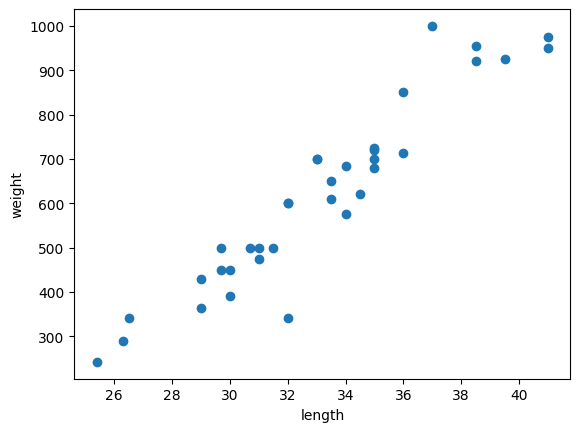

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight) #산점도를 그려라

plt.xlabel('length') # 라벨 이름 형성
plt.ylabel('weight')

plt.show()


In [ ]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

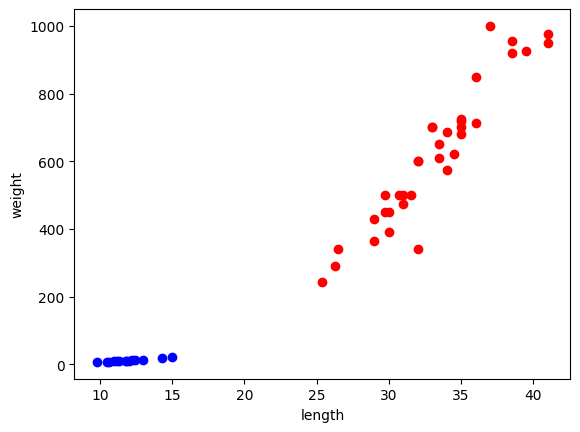

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight, color = 'red') # 산점도를 그려라
plt.scatter(smelt_length, smelt_weight, color = 'blue')

plt.xlabel('length') # 라벨 이름 형성
plt.ylabel('weight')

plt.show()

In [ ]:
# 두 데이터를 스스로 구분하기 위한 머신러닝 프로그램

# k-최근접 아웃 알고리즘


#1. 리스트 2차원의 문제집 자료 준비
length  = bream_length  + smelt_length
weight  = bream_weight + smelt_weight


# scikit-learn : 2차원의 리스트를 형성해야함 (길이-무게) 형식으로 짝을 지어서
fish_data = [[l,w] for l, w in zip(length, weight)]



In [ ]:
# 2. 정답 자료 준비, 몇번쨰 경우에서 답은 도미인지 빙어인지를 구분
# bream = 1, smelt = 0
# 35번 1, 14번 0이 출력되는 정답자료 준비

fish_target = [1] *35 + [0]*14
print(fish_target)


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier # k-최근접 이웃 알고리즘을 구현한 클래스


import sklearn
model = sklearn.neighbors.KNeighborsClassifier
kn = KNeighborsClassifier() # 클래스의 객체를 형성한다(KN은 위의 클래스를 찍은 객체)
# 라이브러리-> 패키지->모듈-> 클래스 순으로 포함관계 성립

kn.fit(fish_data, fish_target) # 문제집, 정답으로 학습
kn.score(fish_data, fish_target) # # fish_data로 도출한 것이 정답지인 fish_target이랑 정답율을 비교(0~1)



1.0

In [ ]:
kn.predict([[30,600]]) # 리스트 2차원이니까 형태 맞추어서 입력하기

# array([1]) : bream 출력

array([1])

In [ ]:
# 가장 가까운 데이터를 참조해서 도미인지 빙어인지를 구분한다
# 기본적인 참고 개수: 5개

kn49  = KNeighborsClassifier(n_neighbors=49) #49개를 참조해서 구분하는 것으로 설정을 변경 (모든 생선을 기준으로)

kn49.fit(fish_data, fish_target)

kn49.score(fish_data, fish_target) # 매개변수를 49로 놓으면 정확도가 더 낮아지다.. 과적합 문제 발생



0.7142857142857143

# chapter 2


In [ ]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [ ]:
fish_data = [[l,w] for l,w in zip(fish_length, fish_weight)]
fish_target = [1] * 35 + [0] * 14

from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()


train_input = fish_data[:35]
train_target  = fish_target[:35]
test_input  = fish_data[35:]
test_target = fish_target[35:]



kn.fit(train_input, train_target)
kn.score(test_input, test_target)
# train샘플을 통해 fit 하고 test샘플을 통해서 score하여 유사도를 검출한다




0.0

In [ ]:
 # 훈련세트랑 테스크 세트에는 각각이 골구로 섞여야 한다!
 # 이것을 해주는 곳이 바로 numpy!
import numpy as np
input_arr = np.array(fish_data)
target_arr  = np.array(fish_target)

input_arr
input_arr.shape # 차원을 알려주는 기능도 있음


(49, 2)

In [ ]:
np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)
index


array([13, 45, 47, 44, 17, 27, 26, 25, 31, 19, 12,  4, 34,  8,  3,  6, 40,
       41, 46, 15,  9, 16, 24, 33, 30,  0, 43, 32,  5, 29, 11, 36,  1, 21,
        2, 37, 35, 23, 39, 10, 22, 18, 48, 20,  7, 42, 14, 28, 38])

In [ ]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

test_input  =  input_arr[index[35:]]
test_target = target_arr[index[35:]]

kn.fit(train_input, train_target)
kn.score(test_input, test_target) #  1 score을 numpy의 random module 을 이용해서 사용할 수 있다!



1.0

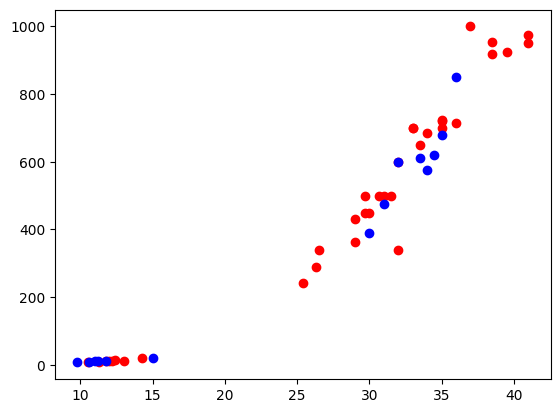

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:, 0], train_input[:, 1], color = 'red')
plt.scatter(test_input[:, 0], test_input[:, 1], color = 'blue')
plt.xlabel= 'length'
plt.ylabel = 'weight'
plt.show()

#모두 섞인것을 확인 할 수 있음

In [ ]:
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

# 2-2   데이터 전처리


In [ ]:
 # 데이터 전처리 과정
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]



In [ ]:
import numpy as np
# np.column_stack() : 세로로 묶어서 2차원 행렬로 만들기
fish_data = np.column_stack((fish_length, fish_weight))
# 항상 입력시에는 하나의 값으로 묶어서 전달할것!


# np.ones(), np.zeros() , 0과 1 로 채워준다
# np.concatenate() : 가로로 이어서 1차원 행렬로 만들기
fish_target = np.concatenate((np.ones(35), np.zeros(14)))



In [ ]:
# 사이킷런으로 훈련세트랑 테스트 세트 나누기
# 전달되는 리스트나 배열의 비율에 알아서 막제 테스트 세트를 랜덤으로 나누어준다

from sklearn.model_selection import train_test_split

#75%의 학습 데이터와 25%의 테스트 데이터로 분할
train_input, test_input, train_target,  test_target = train_test_split(fish_data, fish_target, random_state = 42 )
# 문제집 먼저 작성 후 정답지를 작성한다
print(train_input.shape) # 2차원 형태 75%의 비율로 잘 나뉘어



(36, 2)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)


1.0

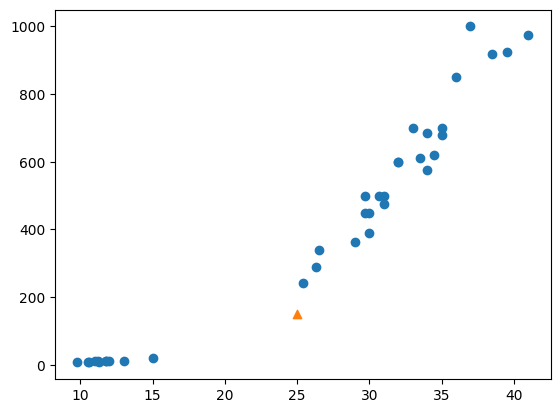

In [ ]:
import matplotlib.pyplot as plt


plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')

plt.show()
# 왜 더 가까운 위쪽이 아니라 아래쪽이라고 판단하는 것일까?

In [ ]:
# 잘못 판단하는 이유
distance, indexes = kn.kneighbors([[25, 150]])
# 리스트 2차원 타입 유지

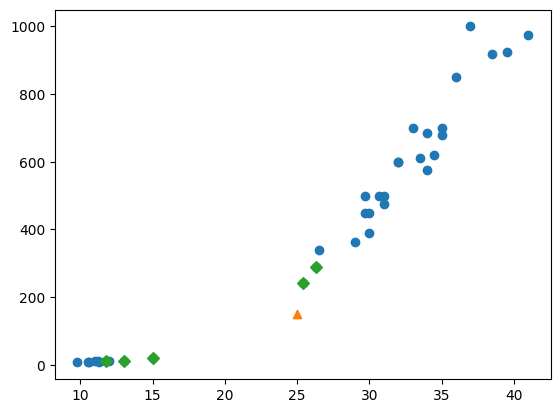

In [ ]:
import matplotlib.pyplot as plt


plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker = 'D')

# 가장 가까운 5개 중에서 indexes의 배열 안의 생선들을 표시

plt.show()

In [ ]:
print(train_input[indexes])
print(train_target[indexes])
print(distance)

# 실제 그래프에 비해서 거리의 차이가 많이 나보이지 않는 이유(92, 130)
# x축과 y축 간의 비율이 다르다!

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 13.   12.2]
  [ 26.3 290. ]
  [ 11.8  10. ]]]
[[1. 0. 0. 1. 0.]]
[[ 92.00086956 130.48375378 138.32150953 140.00603558 140.62090883]]


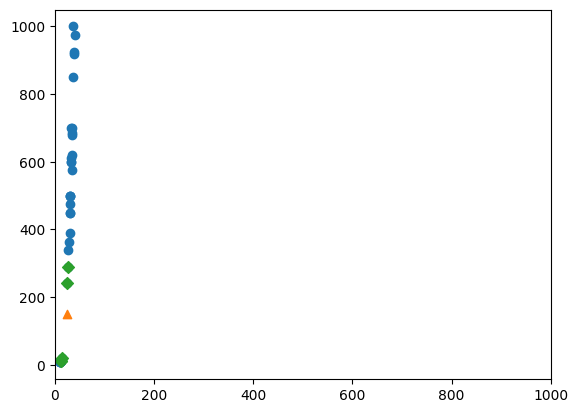

In [ ]:
# x,y축의 기준을 다시 맞춰라!

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker = '^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker = 'D')
plt.xlim((0, 1000)) # x축과 관련하여 재 설정하는 과정
plt.xlabel = 'length'
plt.ylabel = 'weight'
plt.show()

#생선의 무게만 고려대상이 된다

In [ ]:
# 데이터 전처리

mean  = np.mean(train_input, axis = 0) # 세로마다
std  = np.std(train_input, axis = 0)


print(mean,std)

[ 26.175      418.08888889] [ 10.21073441 321.67847023]


In [ ]:
train_scaled = (train_input-mean)/std

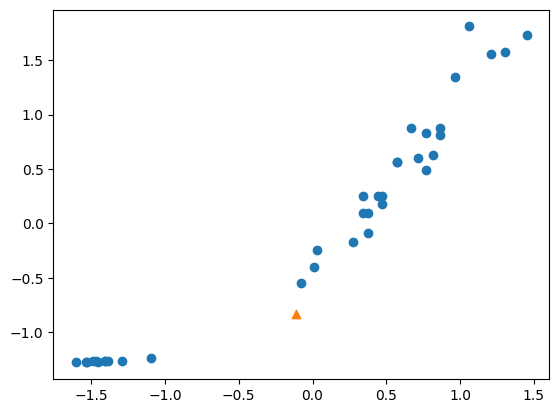

In [ ]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])


new  = ([25,150]-mean)/std
plt.scatter(new[0], new[1], marker = '^') # 특정값도 동일하게 전처리를 한 상태에서 비교해야함


plt.xlabel = 'length'
plt.ylabel = 'weight'
plt.show()


In [ ]:
kn.fit(train_scaled, train_target)

test_scaled = (test_input-mean)/std
kn.score(test_scaled, test_target)

kn.predict([new]) # 정확한 예측을 수행



array([1.])